---
title: "monty hall"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

The famous Monty Hall problem is a great opportunity to apply Bayes' theorem. The problem is named after Monty Hall, the original host of the television game show *Let's Make a Deal*.

Imagine you're a contestant on the show, and you're presented with three doors. Behind one door is a car (the prize you want), and behind the other two doors are goats (which you don't want). You pick a door, say door 1. Monty, who knows what's behind each door, then opens another door, say door 2, which has a goat behind it. He then gives you the option to switch your choice to the remaining unopened door (door 3) or stick with your original choice (door 1). Would it be smarter to switch or stay?

In [1]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib.request
import io

In [ ]:
#| code-summary: "function to add emoji images to plots"
def add_emoji(x, y, emoji_code, ax, style='apple', zoom=0.4):
    """
    Styles available: 
    'apple'  -> Glossy, high-detail (via EmojiGraph)
    'google' -> Flat, rounded (via Google Noto)
    'open'   -> Artistic, outlined (via OpenMoji)
    """
    code = emoji_code.lower()
    
    # URL Options
    if style == 'apple':
        # High-res Apple style
        url = f"https://emojigraph.org/media/apple/{code}_apple.png"
    elif style == 'google':
        # Google Noto Color Emoji
        url = f"https://raw.githubusercontent.com/googlefonts/noto-emoji/master/png/128/emoji_u{code}.png"
    elif style == 'open':
        # OpenMoji (Professional vector-style)
        url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/64/{code.upper()}.png"
    else:
        # Fallback to Twemoji
        url = f"https://abs.twimg.com/emoji/v2/72x72/{code}.png"

    try:
        # We add a User-Agent header because some CDNs block Python's default scraper
        req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        with urllib.request.urlopen(req) as res:
            img_data = io.BytesIO(res.read())
            img = plt.imread(img_data, format='png')
            
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Error loading {style} emoji {emoji_code}: {e}")

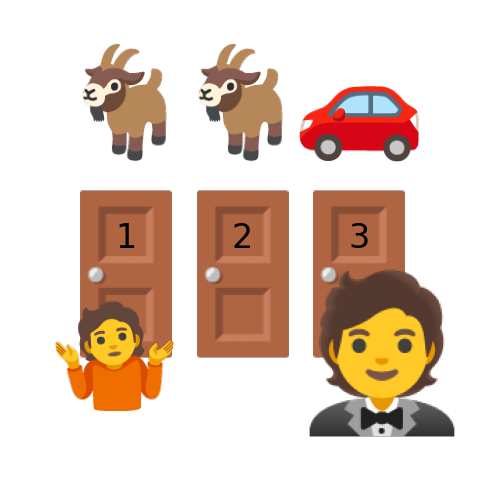

In [14]:
#| code-summary: "monty hall figure"
fig, ax = plt.subplots(figsize=(6, 6))
# door
add_emoji(1, 1, "1f6aa", ax, style="google", zoom=1)
add_emoji(2, 1, "1f6aa", ax, style="google", zoom=1)
add_emoji(3, 1, "1f6aa", ax, style="google", zoom=1) 
# goats
add_emoji(1, 1.65, "1f410", ax, style="google", zoom=0.7)
add_emoji(2, 1.65, "1f410", ax, style="google", zoom=0.7)
# car
add_emoji(3, 1.65, "1f697", ax, style="google", zoom=0.7)
# person shrugging
add_emoji(0.9, 0.7, "1f937", ax, style="google", zoom=0.7)
# man in tuxedo
add_emoji(3.2, 0.7, "1f935", ax, style="google", zoom=1.0)
ax.text(1, 1.1, "1", fontsize=24, ha='center')
ax.text(2, 1.1, "2", fontsize=24, ha='center')
ax.text(3, 1.1, "3", fontsize=24, ha='center')
ax.set(xlim=(0,4), ylim=(0.25,2))
ax.axis('off');

## Bayes' Theorem

We can formulate this problem as the conditional probability:

$$
P(\text{car behind 1} \mid \text{Monty opens 2})
$$

We can use Bayes' theorem to compute this:

$$
P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)},
$$

where

- $A$ is the event "car behind door 1"
- $B$ is the event "Monty opens door 2"

Let's rewrite Bayes' theorem for our specific events:

$$
P(\text{car behind 1} \mid \text{Monty opens 2}) = \frac{P(\text{Monty opens 2} \mid \text{car behind 1}) P(\text{car behind 1})}{P(\text{Monty opens 2})}
$$

Let's compute each term.

### likelihood

$P(\text{Monty opens 2} \mid \text{car behind 1})$

In English: assuming we know the car is behind door 1, what is the probability that Monty opens door 2?
In that case, Monty could have opened either door 2 or door 3 with equal probability, so the answer is 1/2.

### prior

$P(\text{car behind 1})$

Before Monty opened any door, the probability that the car is behind door 1 is 1/3.

### evidence

$P(\text{Monty opens 2})$

We can compute this using the law of total probability. The evidence is a marginal probability, and it is the sum of the joint probabilities over all possible locations of the car:

\begin{align*}
P(\text{Monty opens 2}) &= P(\text{Monty opens 2} \cap \text{car behind 1}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 2}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 3})
\end{align*}

By the rules of the game, the second term is zero, because Monty will never ruin the fun by opening the door with the car behind it. For the other two terms, we can use the definition of conditional probability:

* First term:
    $$
    P(\text{Monty opens 2} \cap \text{car behind 1}) = P(\text{Monty opens 2} \mid \text{car behind 1}) \cdot P(\text{car behind 1})
    $$
    The first part is the likelihood we computed above (1/2), and the second part is the prior (1/3). So the first term is 1/6.
* Third term:
    $$
    P(\text{Monty opens 2} \cap \text{car behind 3}) = P(\text{Monty opens 2} \mid \text{car behind 3}) \cdot P(\text{car behind 3})
    $$
    In this case, if the car is behind door 3, Monty has no choice but to open door 2, so the first part is 1. The second part is again the prior (1/3). So the third term is 1/3.

Putting it all together, the evidence is:
$$
P(\text{Monty opens 2}) = \frac{1}{6} + 0 + \frac{1}{3} = \frac{1}{2}
$$

Finally, we can plug everything back into Bayes' theorem:
$$
P(\text{car behind 1} \mid \text{Monty opens 2}) = \frac{\frac{1}{2} \cdot \frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}
$$

The probability that the car is behind door 1 is still 1/3. The logical conclusion is that the probability that the car is behind door 3 is 2/3, so you should switch!

## reflections

I posed this question to my children, and they said the same thing: "What does it matter if Monty reveals that another door has a goat? That doesn't change anything! There are now two doors, each equally likely to have the car behind it." (those weren't exactly their words, I'm paraphrasing).

There is both truth and confusion in what they said!

**"It doesn't change anything!"** This is "sorta" true. Our prior probability that the car is behind door 1 was 1/3, and our posterior probability is still 1/3. The information that Monty revealed a goat behind door 2 did not change our belief about door 1. Nothing changed here!

**"There are now two doors, each equally likely to have the car behind it."** Since the probability that the car is behind door 1 is 1/3, the probability that it is behind door 3 must be 2/3. The two doors are not equally likely to have the car behind them!

How could all the probability from door 2 have been fully transferred to door 3?

## Monty selects at random

Let's imagine a different game, where Monty opens a door at random (one you haven't chosen), and it just so happens that he reveals a goat. How would the calculation change?

The **likelihood** $P(\text{Monty opens 2} \mid \text{car behind 1})$ remains the same (1/2). If the car is behind door 1, Monty could have opened either door 2 or door 3 with equal probability. 

The **prior** $P(\text{car behind 1})$ is also the same (1/3).

Now let's see the **evidence**:

\begin{align*}
P(\text{Monty opens 2}) &= P(\text{Monty opens 2} \cap \text{car behind 1}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 2}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 3}),
\end{align*}

becomes

\begin{align*}
P(\text{Monty opens 2}) &= P(\text{Monty opens 2} \mid \text{car behind 1})P(\text{car behind 1}) \\
                        &+ P(\text{Monty opens 2} \mid \text{car behind 2})P(\text{car behind 2}) \\
                        &+ P(\text{Monty opens 2} \mid \text{car behind 3})P(\text{car behind 3}),
\end{align*}

All three terms are the same now! Monty will randomly open one of the remaining two doors, regardless of where the car is. Sure, that could ruin the game, but bear with me. The three terms above are all the product of 1/2 (the probability that Monty randomly opens door 2) and 1/3 (the prior probability that the car is behind each door). So we have:

$$
P(\text{Monty opens 2}) = \frac{1}{2}\cdot \frac{1}{3} + \frac{1}{2}\cdot \frac{1}{3} + \frac{1}{2}\cdot \frac{1}{3} = \frac{1}{2}
$$

Hmmm... I just assumed that the evidence would be different from the original problem, but it turns out to be the same (1/2). All results being the same, the posterior probability that the car is behind door 1 is still 1/3. Where's the catch?!

I think that now we know that with a 1/3 probability Monty would have revealed the car behind door 2, ruining the game. But since he revealed a goat, we are in the 2/3 probability case where the car is behind either door 1 or door 3. Since we calculated that the probability that the car is behind door 1 is still 1/3, it follows that the probability that it is behind door 3 is 1/3. When Monty opens a door at random there is no "transfer of probability", and it doesn't matter if we switch or not! The transfer of probability happens only when Monty judiciously chooses which door to open. Let's try another variation.

## many doors to select from

What if the game had $N$ doors (think 100, something big), and you picked door 1? Let's call "door 2" the door that Monty opens, revealing a goat. How do the probabilities change now?

**Prior:** $P(\text{car behind 1}) = \frac{1}{N}$

**Likelihood:** $P(\text{Monty opens 2} \mid \text{car behind 1}) = \frac{1}{N-1}$. If the car is behind door 1, Monty can open any of the other $N-1$ doors with equal probability.

**Evidence:**

\begin{align*}
P(\text{Monty opens 2}) &= P(\text{Monty opens 2} \cap \text{car behind 1}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 2}) \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind 3}) \\
                        &+ \ldots \\
                        &+ P(\text{Monty opens 2} \cap \text{car behind N})
\end{align*}

This becomes

\begin{align*}
P(\text{Monty opens 2}) &= P(\text{Monty opens 2} \mid \text{car behind 1})\cdot P(\text{car behind 1}) \\
                        &+ 0 \\
                        &+ P(\text{Monty opens 2} \mid \text{car behind 3})\cdot P(\text{car behind 3}) \\
                        &+ \ldots \\
                        &+ P(\text{Monty opens 2} \mid \text{car behind N})\cdot P(\text{car behind N})
\end{align*}

Again, Monty will never open the door with the car behind it, so the second term is zero. The first term is the product of the likelihood and the prior, while all the rest of the $N-2$ terms are the same: if the car is behind any of those doors (3, 4, ..., N), Monty can open door 2 with probability $1/(N-2)$, because door 1 is taken by you, and the door with the car behind it cannot be opened. The second part of those terms is the prior, which is $1/N$. So we have:

\begin{align*}
P(\text{Monty opens 2}) &= \frac{1}{N-1}\cdot \frac{1}{N} \\
                        &+ 0 \\
                        &+ \frac{1}{N-2} \cdot \frac{1}{N} \\
                        &+ \ldots \\
                        &+ \frac{1}{N-2} \cdot \frac{1}{N}
\end{align*}

Clearly, there are $N-2$ identical terms in the sum, so we can write:

\begin{align*}
P(\text{Monty opens 2}) &= \frac{1}{N-1}\cdot \frac{1}{N} + \frac{1}{N} \\
                        &= \frac{1}{N}\left( \frac{1}{N-1} + 1 \right) \\
                        &= \frac{1}{N}\cdot \frac{N}{N-1} \\
                        &= \frac{1}{N-1}
\end{align*}

This "miraculous" simplification is surely the key to understanding the transfer of probability! Let's keep going.

**Posterior:**
Plugging everything back into Bayes' theorem:
$$
P(\text{car behind 1} \mid \text{Monty opens 2}) = \frac{\frac{1}{N-1} \cdot \frac{1}{N}}{\frac{1}{N-1}} = \frac{1}{N}.
$$

The probability that the car is behind door 1 is still 1/N. All remaining doors (3, 4, ..., N) are equally likely to have the car behind them, so the probability that the car is behind any of those doors is the complement of $1/N$ divided by the number of those doors ($N-2$).

## transfer of probability

The fact that Monty knows where the car is and will never open a door with the car behind it creates a dependency between the doors.
The "miraculous" simplification we saw before means that the evidence term cancels out the likelihood term when computing the posterior for door 1, leaving its probability unchanged.

Bayes' theorem can be written as:

$$
\text{Posterior} = \left( \frac{\text{Likelihood}}{\text{Evidence}} \right) \times \text{Prior}
$$

The term in the parentheses, what we found to be 1 in this case, is called the Bayes factor. In some contexts, this term is also called updating factor, because it tells us how much to update our prior belief based on the evidence we observed. Here, the updating factor for door 1 is 1, meaning that our belief about door 1 does not change.

When Monty opens door 2, all the probability mass that was assigned to that door is equally redistributed among the remaining doors (except door 1, which we already established remains at $1/N$).

## information

How much information did we get from Monty opening door 2? We can measure this using the Kullback-Leibler divergence between the prior and posterior distributions:

$$
D_{KL}(\mathbf{p} \| \mathbf{q}) = \sum_i \mathbf{p}(i) \log\frac{\mathbf{p}(i)}{\mathbf{q}(i)},
$$
where $\mathbf{p}$ is the posterior distribution and $\mathbf{q}$ is the prior distribution.

In the case of three doors, the prior and posterior distributions are:

$$
\mathbf{q} = \left[ \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \right], \quad \mathbf{p} = \left[ \frac{1}{3}, 0, \frac{2}{3} \right].
$$

When summing over all doors, the first term contributes 0, since the prior and posterior probabilities are the same (1/3). The second term also contributes 0, since the posterior probability is 0. Only the third term contributes to the information gain:

$$
D_{KL}(\mathbf{p} \| \mathbf{q}) = \frac{2}{3} \log\frac{\frac{2}{3}}{\frac{1}{3}} = \frac{2}{3} \log 2 \approx 0.462.
$$

For N doors, the prior and posterior distributions are:

$$
\mathbf{q} = \left[ \frac{1}{N}, \frac{1}{N}, \ldots, \frac{1}{N} \right], \quad \mathbf{p} = \left[ \frac{1}{N}, 0, \ldots, \frac{1}{N-2} \cdot \frac{N-1}{N}, \ldots, \frac{1}{N-2} \cdot \frac{N-1}{N} \right].
$$

Once more, the first two terms contribute 0 to the information gain, and only the remaining $N-2$ terms contribute:
$$
D_{KL}(\mathbf{p} \| \mathbf{q}) = (N-2) \cdot \frac{1}{N-2} \cdot \frac{N-1}{N} \log\frac{\frac{1}{N-2} \cdot \frac{N-1}{N}}{\frac{1}{N}} = \frac{N-1}{N} \log\frac{N-1}{N-2}.
$$

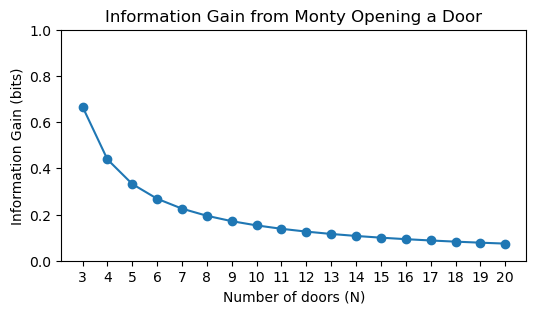

In [21]:
fig, ax = plt.subplots(figsize=(6, 3))
N = np.arange(3,21)
DKL = ((N-1)/N) * np.log2((N-1)/(N-2))
ax.plot(N, DKL, marker='o')
ax.set(xlabel="Number of doors (N)",
       ylabel="Information Gain (bits)",
       title="Information Gain from Monty Opening a Door",
       xticks=N,
       ylim=(0, 1)
       );

We learn from computing the posterior that it is equal to the prior after Monty opens door 2. That, of course, is not the whole story. The calculation of the information gain makes it explicit that the posterior is not a number, but a distribution. This is important to remember when we work with Bayesian statistics. Let's state the first sentence in a more precise way: The probability that the car is behind door 1 remains unchanged, but the probabilities of the other doors change, and we learn something from that change. The more doors there are, the less informative is the revelation that door 2 has a goat behind it, as shown in the plot above.